# Simple model using double exponentials

In [52]:
from sympy import *

In [53]:
from IPython.display import display, Markdown

In [54]:
init_printing()

In [55]:
t, P, e_r, e_d, delta_e, rho_e, g_e, i_r, i_d, delta_i, rho_i, g_i, b = symbols('t P \\tau_{er} \\tau_{ed} \\delta_e \\rho_e \\bar{g}_e \\tau_{ir} \\tau_{id} \\delta_i \\rho_i \\bar{g}_i \\beta', positive=True, real=True)

In [56]:
SymbolDict = {t: "Time (ms)", P: "Proportion of $g_i/g_e$", e_r: "Excitatory Rise (ms)", e_d: "Excitatory Fall (ms)", delta_e: "Excitatory onset time (ms)", rho_e: "Excitatory $tau$ ratio (fall/rise)", g_e: "Excitatory max conductance", i_r : "Inhibitory Rise (ms)", i_d : "Inhibitory Fall(ms)", delta_i:"Inhibitory onset time(ms)", rho_i: "Inhibitory $tau$ ratio (fall/rise)", g_i: "Inhibitory max conductance", b: "Inhibitory/Excitatory $tau$ rise ratio"}

In [57]:
estimateDict = { P: (1.9,2.1), e_r: (1.5,5), e_d: (8,20), delta_e: (0,0), rho_e: (2,7), g_e: (0.02,0.25), i_r : (1.5,5), i_d : (14,60), delta_i:(3,8), rho_i: (5,20), g_i:(0.04,0.5) , b:(0.5,5) }

In [58]:
averageEstimateDict = {key: pow(value[0]*value[1],0.5) for key,value in estimateDict.items()}

In [59]:
#averageEstimateDict = {key: ((value[0]+value[1])/2.) for key,value in estimateDict.items()}

In [60]:
print "| Variable  |  Meaning |  Range |"
print "|---|---|---|"
print "|$t$|Time (ms)|0-100|"
for i in [P, e_r, e_d, delta_e, rho_e, g_e, i_r, i_d, delta_i, rho_i, g_i, b]:
    print "|${}$|{}|{}-{}|".format(i, SymbolDict[i], estimateDict[i][0], estimateDict[i][1])

| Variable  |  Meaning |  Range |
|---|---|---|
|$t$|Time (ms)|0-100|
|$P$|Proportion of $g_i/g_e$|1.9-2.1|
|$\tau_{er}$|Excitatory Rise (ms)|1.5-5|
|$\tau_{ed}$|Excitatory Fall (ms)|8-20|
|$\delta_e$|Excitatory onset time (ms)|0-0|
|$\rho_e$|Excitatory $tau$ ratio (fall/rise)|2-7|
|$\bar{g}_e$|Excitatory max conductance|0.02-0.25|
|$\tau_{ir}$|Inhibitory Rise (ms)|1.5-5|
|$\tau_{id}$|Inhibitory Fall(ms)|14-60|
|$\delta_i$|Inhibitory onset time(ms)|3-8|
|$\rho_i$|Inhibitory $tau$ ratio (fall/rise)|5-20|
|$\bar{g}_i$|Inhibitory max conductance|0.04-0.5|
|$\beta$|Inhibitory/Excitatory $tau$ rise ratio|0.5-5|


| Variable  |  Meaning |  Range |
|---|---|---|
|$t$|Time (ms)|0-100|
|$P$|Proportion of $g_i/g_e$|1.9-2.1|
|$\tau_{er}$|Excitatory Rise (ms)|1.5-5|
|$\tau_{ed}$|Excitatory Fall (ms)|8-20|
|$\delta_e$|Excitatory onset time (ms)|0-0|
|$\rho_e$|Excitatory $tau$ ratio (fall/rise)|2-7|
|$\bar{g}_e$|Excitatory max conductance|0.02-0.25|
|$\tau_{ir}$|Inhibitory Rise (ms)|1.5-5|
|$\tau_{id}$|Inhibitory Fall(ms)|14-60|
|$\delta_i$|Inhibitory onset time(ms)|3-15|
|$\rho_i$|Inhibitory $tau$ ratio (fall/rise)|5-20|
|$\bar{g}_i$|Inhibitory max conductance|0.04-0.5|
|$\beta$|Inhibitory/Excitatory $tau$ rise ratio|0.5-5|

### Double exponential to explain the net synaptic conductance.

In [61]:
alpha = exp(-(t-delta_e)/e_d) - exp(-(t-delta_e)/e_r)

In [62]:
alpha

In [63]:
#alpha = alpha.subs(e_d, (rho_e*e_r)).doit()

In [64]:
alpha_prime = alpha.diff(t)

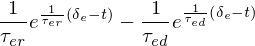

In [65]:
alpha_prime

In [66]:
theta_e = solve(alpha_prime,t) # Time to peak

In [67]:
theta_e = logcombine(theta_e[0])

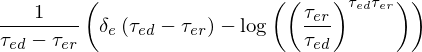

In [68]:
theta_e

In [69]:
N(theta_e.subs(averageEstimateDict))

In [70]:
alpha_star = simplify(alpha.subs(t, theta_e).doit())

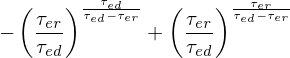

In [71]:
alpha_star

In [72]:
#alpha_star = simplify(alpha) # Replacing e_d/e_r with tau_e

### Finding maximum of the curve and substituting ratio of taus

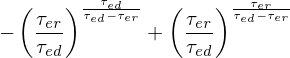

In [73]:
alpha_star

In [74]:
E = Piecewise((0, t < delta_e), (g_e * (alpha/alpha_star), True))

### Final equation for Excitation normalized to be maximum at $g_e$

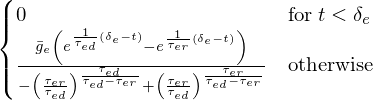

In [75]:
E

### Verifying that E Behaves

In [76]:
E_check = N(E.subs(averageEstimateDict))

In [77]:
E_check.free_symbols

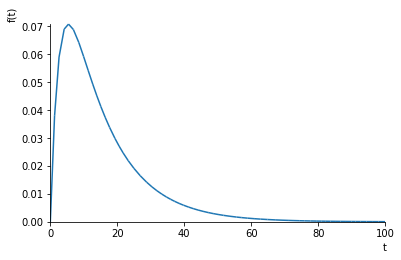

In [78]:
plot(E_check,(t,0,100))

### Doing the same with inhibition

In [79]:
I = E.xreplace({g_e: g_i, rho_e: rho_i, e_r:i_r, e_d: i_d, delta_e: delta_i})

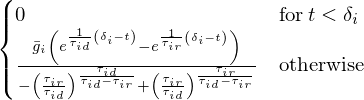

In [80]:
I

### Verifying that I Behaves

In [81]:
I_check = N(I.subs(averageEstimateDict))

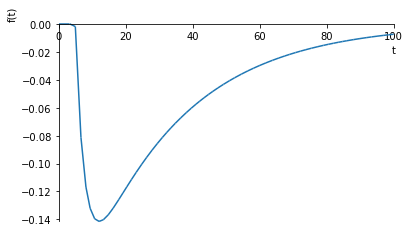

In [82]:
plot(-I_check,(t,0,100))

### Now finding the control peak using difference of these double-exponentials

In [83]:
C =  E - I

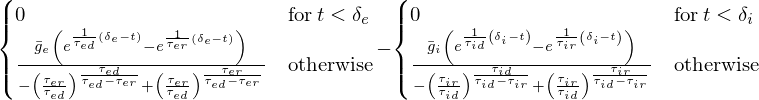

In [84]:
C

In [ ]:
# 1. Get rid of the normalization factor.
# 2. The functions must approximate each other when close to 0.
# 3. The precision of the parameters in the equations must increase with g_e.

### Substituting excitatory and inhibitory ratios and putting $\delta_e$ to zero.

In [85]:
#C = C.subs({g_i: g_e*P, i_r : e_r*b}) # Replacing g_i with P*ge
C = C.subs({delta_e:0})

In [86]:
C_check = N(C.subs(averageEstimateDict))

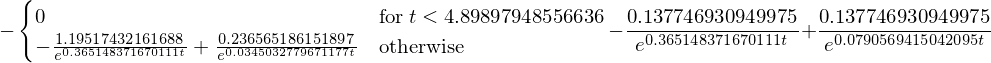

In [87]:
C_check

### Verifying that C behaves

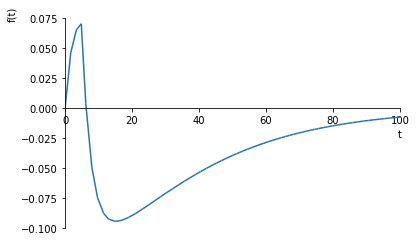

In [88]:
plot(C_check,(t,0,100))

In [89]:
#C_check = N(C.subs({rho_e:7, rho_i: 15}))

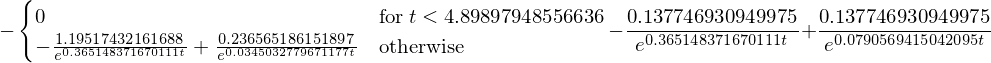

In [90]:
C_check

In [91]:
C_check = C_check.subs(averageEstimateDict)

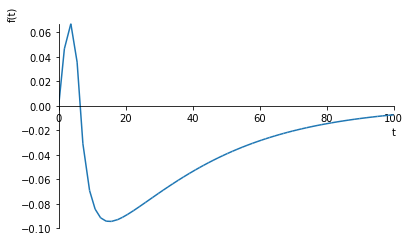

In [92]:
plot(C_check,(t,0,100))

In [93]:
C_prime = diff(C,t)

In [94]:
C_prime_check = N(C_prime.subs(averageEstimateDict))

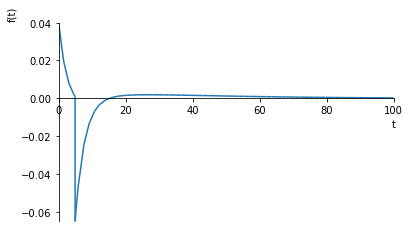

In [95]:
plot(C_prime_check,(t,0,100))

In [96]:
C_prime_prime = diff(C_prime,t)

In [97]:
C_prime_prime_check = N(C_prime_prime.subs(averageEstimateDict))

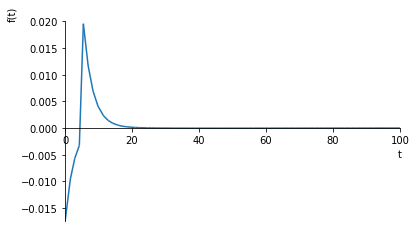

In [98]:
plot(C_prime_prime_check,(t,0,100))

<div></div>

In [99]:
#simplify(C.subs(t,log(T)))

NameError: name 'T' is not defined

In [ ]:
#C.subs(delta_i, 1/g_e)

In [ ]:
#x, denominator = cse(simplify(C_prime.as_numer_denom()))

In [ ]:
#T = symbols('T')

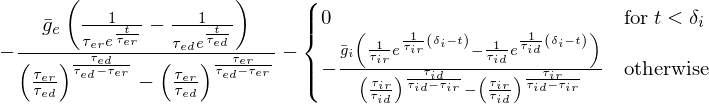

In [105]:
simplify(C_prime)

#### Explicit solving this equation doesn't work

### Trying to use lambert function

In [120]:
a,b,c,d = -t/e_r, -t/e_d, -(t - delta_i)/i_r, -(t - delta_i)/i_d

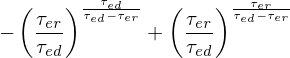

In [133]:
alpha_star

In [121]:
W = lambda z: z*exp(z)

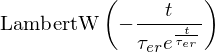

In [151]:
LambertW(W(a))

In [158]:
C = g_e*(exp(LambertW(W(a))) - exp(LambertW(W(b))))/alpha_star - g_i*(exp(LambertW(W(c))) - exp(LambertW(W(d))))/alpha_star.subs({ e_r:i_r, e_d: i_d})

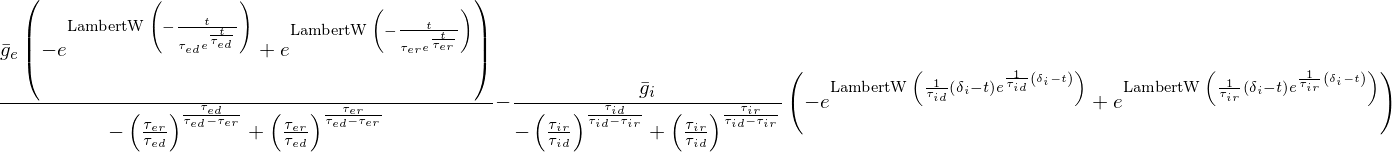

In [159]:
C

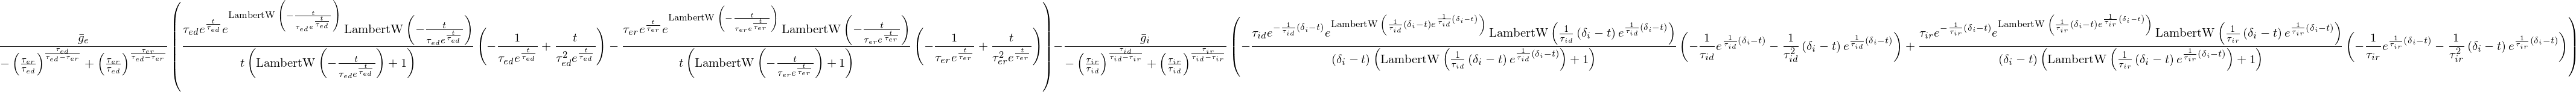

In [163]:
C.diff(t)

In [164]:
t_star = solve(expand(C.diff(t)),t)

KeyboardInterrupt: 

In [ ]:
a

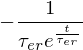

In [141]:
exp(a).diff(t)

In [140]:
mpmath.lambertw(1)

mpf('0.56714329040978384')

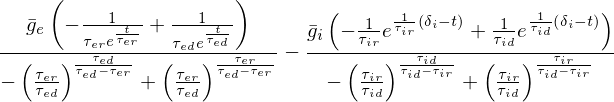

In [138]:
C.diff(t)

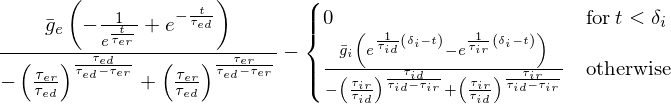

In [131]:
powsimp(C.subs({-t/e_r:a, -t/e_d:b, -(t - delta_i)/i_r:c, -(t - delta_i)/i_d:d}))

In [129]:
piecewise_C_star = simplify(ratsimp(factor(C_prime))).args

In [ ]:
C_star_1 = simplify(piecewise_C_star[1][0])

In [ ]:
C_star_1.args

In [ ]:
simplify(solveset(C_star_1.args[5],t).doit())

In [ ]:
factor(C_star_1).collect(exp(t)).args

In [ ]:
expand_log(factor(C_prime))

In [ ]:
denominator

In [ ]:
-x[5]/((i_d*exp(x[13]*x[9])) - (i_r*(exp(x[13]/i_d))))

In [ ]:
j,k = symbols({'J','K'})

In [ ]:
new_eq = simplify(C_prime.subs({e_d:e_r*((j+1)/(j-1)), i_d:i_r*((k+1)/(k-1))}))

In [ ]:
refine(powsimp(new_eq.as_numer_denom()))

In [ ]:
eq_1 = latex("\bar{g}_e*\tau_{er}*(-P*\rho_e*\rho_i**(\rho_i/(\rho_i - 1) - 1 + 1/(\rho_i - 1))*(\rho_e**(\rho_e/(\rho_e - 1)) - \rho_e**(1/(\rho_e - 1)))*(\rho_i*exp((\delta_i - t)/(\beta*\tau_{er})) - exp((\delta_i - t)/(\beta*\rho_i*\tau_{er})))*exp(t*(\rho_e + 1)/(\rho_e*\tau_{er}))/(\beta*(\rho_i**(\rho_i/(\rho_i - 1)) - \rho_i**(1/(\rho_i - 1)))) + \rho_e**((\rho_e + 1)/(\rho_e - 1))*(\rho_e*exp(t/(\rho_e*\tau_{er})) - exp(t/\tau_{er})))")

In [ ]:
eq_1

In [ ]:
C.diff(t).diff(t)

In [ ]:
t_star = (delta_i - (b*e_r*log((P*(rho_i+1)*rho_e)/((rho_e+1)*rho_i))))/(b+1)

In [ ]:
t_star.subs(averageEstimateDict)

In [ ]:
N(delta_i.subs(averageEstimateDict))

<div></div>

### Unfortunately this is not possible: Since the $\tau_{decay}$ will not contribute to the first peak, we can eliminate them.

In [ ]:
erise = Piecewise((0, t < delta_e), (g_e * (exp(-(t-delta_e)/e_r)/alpha_star), True))

In [ ]:
efall = Piecewise((0, t < delta_e), (g_e * (exp(-(t-delta_e)/e_d)/alpha_star), True))

In [ ]:
irise = erise.subs({g_e: g_i, rho_e: rho_i, e_r:i_r, e_d: i_d, delta_e: delta_i})

In [ ]:
ifall = efall.subs({g_e: g_i, rho_e: rho_i, e_r:i_r, e_d: i_d, delta_e: delta_i})

In [ ]:
C = C.subs({g_i: g_e*P, i_r : e_r*b}) # Replacing g_i with P*ge
C = C.subs({delta_e:0})

In [ ]:
C

In [ ]:
C_check = C.subs({P:0, delta_i:2})

In [ ]:
C_check

In [ ]:
C

In [ ]:
C.diff(t)

In [ ]:
averageEstimateDict

In [ ]:
C_check = N(C.subs(averageEstimateDict))

In [ ]:
C_check

### Verifying that C behaves

In [ ]:
plot(C_check,(t,0,100))

In [ ]:
plot(erise.subs(averageEstimateDict),(t,0,100))

In [ ]:
plot(((efall-erise)-(-irise)).subs(averageEstimateDict),(t,0,100))

In [ ]:
plot(((efall-erise)-(ifall-irise)).subs(averageEstimateDict),(t,0,100))

In [ ]:
plot((E-I).subs(averageEstimateDict),(t,0,100))

In [ ]:
C_check = N(C.subs({rho_e:7, rho_i: 15}))

In [ ]:
C_check

In [ ]:
C_check = C_check.subs(averageEstimateDict)

In [ ]:
plot(C_check,(t,0,100))

In [ ]:
C_prime = diff(C,t)

In [ ]:
C_prime_check = N(C_prime.subs(averageEstimateDict))

In [ ]:
plot(C_prime_check,(t,0,100))

In [ ]:
C_prime_prime = diff(C_prime,t)

In [ ]:
C_prime_prime_check = N(C_prime_prime.subs(averageEstimateDict))

In [ ]:
plot(C_prime_prime_check,(t,0,100))

<div></div>

In [ ]:
simplify(C)

In [ ]:
C_prime = diff(C,t)

In [ ]:
C_prime

In [ ]:
theta_C = solve(C_prime, t)

In [ ]:
theta_C

In [ ]:
C_star = C.subs(t, theta_C[0])

In [ ]:
C_star = C_star.subs(delta_e,0.) # Putting excitatory delay to zero

### Assuming that certain ratios are more than one and substituting

In [ ]:
C_star = C_star.subs({i_d: (i_r*tau_i)+i_r, e_d: (e_r*tau_e)+e_r, g_i: g_e*P, i_r:e_r*b}) # Replacing e_d/e_r with tau_e

In [ ]:
C_star = cancel(powsimp(factor(C_star), deep=True))

In [ ]:
C_star = C_star.collect([g_e, delta_i, P])

In [ ]:
#C_star1 = limit(limit(C_star, (1/tau_e), 0), (1/tau_i),0)

In [ ]:
#simplify(C_star.subs({e_r: 4., i_r: 2.73, g_i:P*g_e, e_d: g_e*b, i_d : g_e*g, delta_i: theta/g_e }))

In [ ]:
#cancel(C_star1.together(deep=True))

In [ ]:
C_star.free_symbols

In [ ]:
#tau_e1, tau_i1 = symbols('\\tau_{e1} \\tau_{i1}', real=True, positive=True)

In [ ]:
#simplify(C_star.subs({tau_e:tau_e1+1, tau_i:tau_i1+1}))

In [ ]:
C_star = simplify(C_star)

In [ ]:
C_star

In [ ]:
cse(C_star)

In [ ]:
cse(simplify(diff(C_star,g_e)))

In [ ]:
x = Symbol('x')

In [ ]:
y = x**(1/x)

In [ ]:
y.subs(x,40).evalf()

In [ ]:
theta_C_nice = simplify(theta_C[0].subs({i_d: (i_r*tau_i)+i_r, e_d: (e_r*tau_e)+e_r, g_i: g_e*P}))

In [ ]:
cse(cancel(expand(theta_C_nice)))

In [ ]:
theta_C_nice

In [ ]:
limit(x/(x-1),x,5)

In [ ]:
log(-2)